Descision Tree Algorithm

Descison Tree

In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz,plot_tree
from io import StringIO
import numpy as np
data = pd.read_csv("5.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Outcome'>

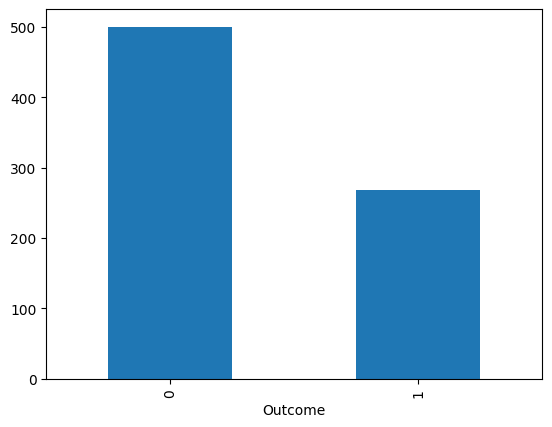

In [3]:
data["Outcome"].value_counts().plot(kind="bar")

In [4]:
#encodeing the target variable

lb = LabelEncoder()
lb.fit(data["Outcome"])
data["Outcome"]= lb.transform(data["Outcome"])

x = data.drop("Outcome", axis = 1)
y = data["Outcome"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

diabetes= DecisionTreeClassifier(  criterion="entropy", splitter="best",max_depth=3, max_features=3 )
diabetes.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=3)

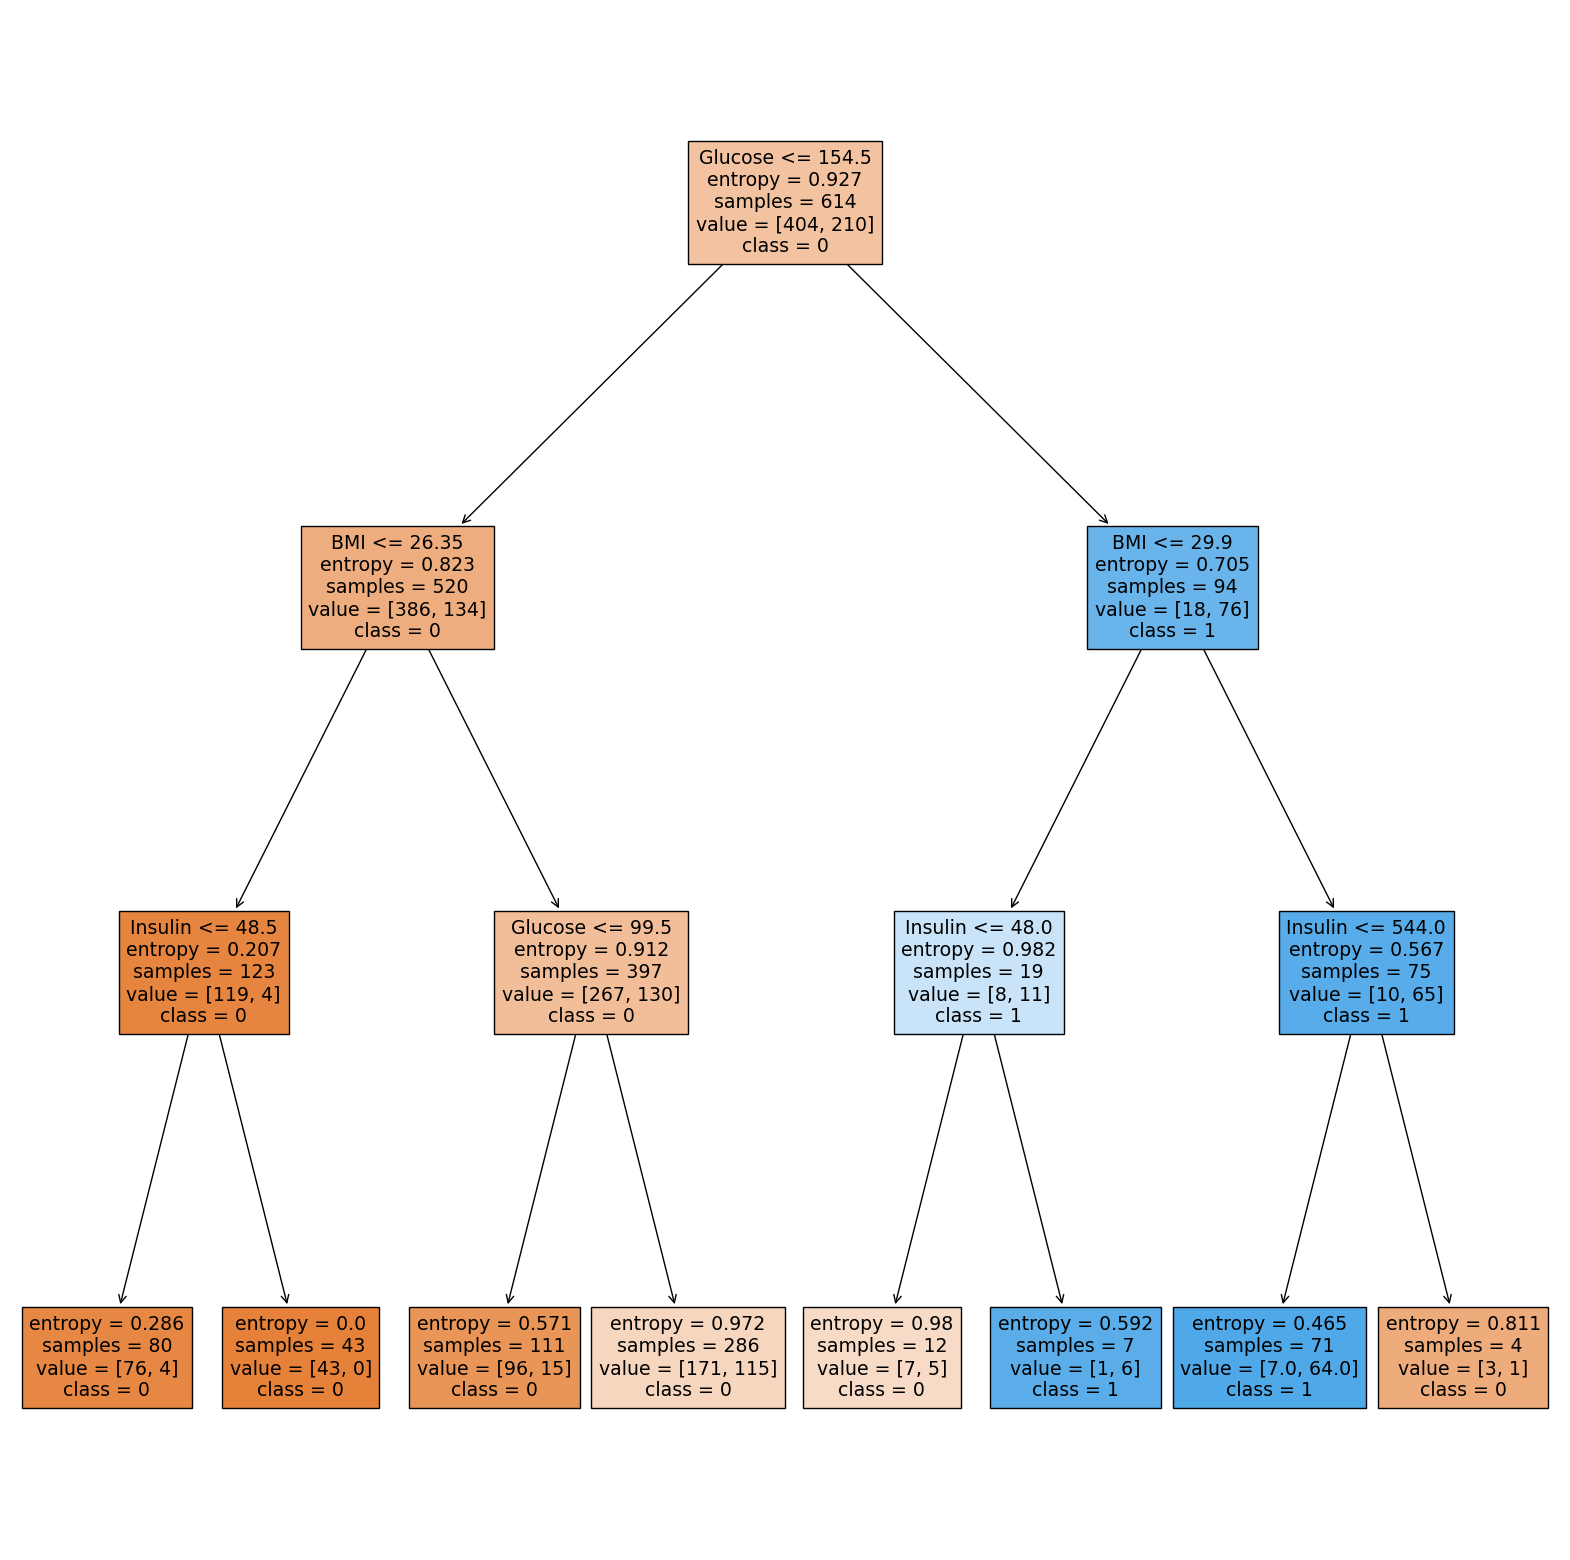

In [7]:
plt.figure(figsize=(20, 20))

# Convert class labels to strings
class_names = [str(label) for label in lb.classes_]

# Plot the decision tree
plot_tree(diabetes, class_names=class_names, feature_names=list(x_train.columns), filled=True)
plt.show()


In [8]:
pred = diabetes.predict(x_test)

In [9]:
print("Accuracy", accuracy_score(y_test,pred))


Accuracy 0.7207792207792207


In [12]:
features = pd.DataFrame({'Features':x_train.columns,'Importance':np.round(diabetes.feature_importances_,3)})
features = features.sort_values('Importance', ascending=False)
features

,Features,Importance
1,Glucose,0.626
5,BMI,0.299
4,Insulin,0.076
0,Pregnancies,0.000
2,BloodPressure,0.000
3,SkinThickness,0.000
6,DiabetesPedigreeFunction,0.000
7,Age,0.000
